In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('UpahRataRataPerJamPekerjaMenurutProvinsi.csv')

In [12]:
dataset.head()

,Provinsi,2020,2021,2022
0,ACEH,18099,17037,16772
1,SUMATERA UTARA,15949,15486,15131
2,SUMATERA BARAT,17571,16630,15887
3,RIAU,18411,19144,18626
4,JAMBI,15840,16043,16042


In [49]:
X = dataset.iloc[:,1:4].values

In [50]:
X

array([[18099, 17037, 16772],
       [15949, 15486, 15131],
       [17571, 16630, 15887],
       [18411, 19144, 18626],
       [15840, 16043, 16042],
       [15072, 15873, 15978],
       [17407, 18271, 16501],
       [14912, 15224, 13218],
       [15763, 17692, 18132],
       [25032, 25736, 23528],
       [28420, 30662, 32685],
       [19078, 19716, 19038],
       [12707, 13072, 12604],
       [15771, 15098, 14916],
       [14389, 14789, 15119],
       [23035, 24839, 23880],
       [17775, 17662, 16857],
       [13627, 12992, 11734],
       [17696, 16386, 13012],
       [16098, 16127, 16337],
       [20677, 21040, 19795],
       [18863, 18874, 18661],
       [24097, 23943, 22281],
       [26002, 22972, 20320],
       [21390, 20963, 18335],
       [18140, 20637, 15890],
       [19172, 19217, 17257],
       [20449, 19302, 17542],
       [15128, 14613, 14289],
       [18136, 18072, 14774],
       [26198, 21156, 17006],
       [23338, 21131, 18278],
       [27904, 29600, 24128],
       [32

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

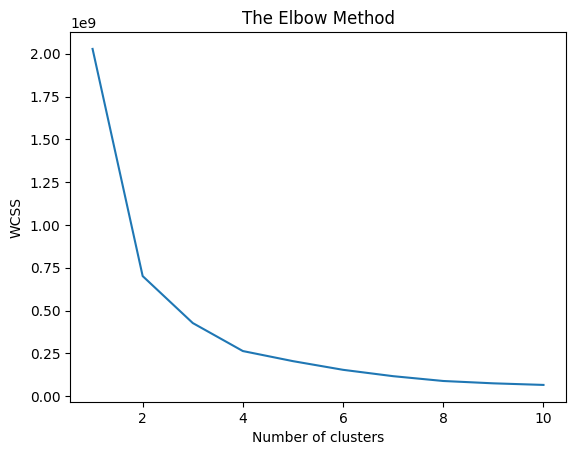

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


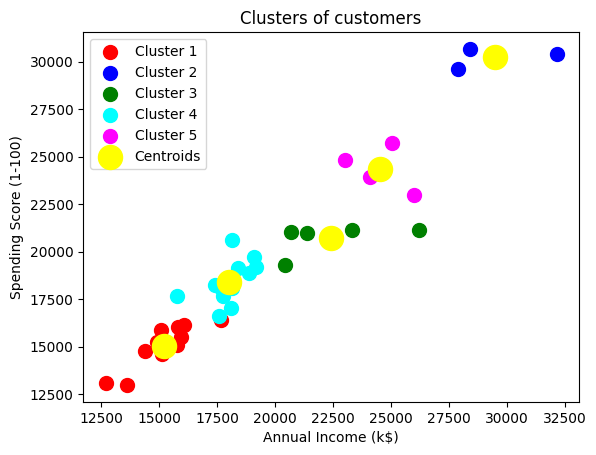

In [54]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()